# Drill: Present the same data multiple ways

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab
from scipy.stats import ttest_ind
import scipy.stats
%matplotlib inline

/Users/fnkyazn/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [68]:
car_crashes = pd.read_csv('car_crashes.csv')
exercise = pd.read_csv('exercise.csv')
flights = pd.read_csv('flights.csv')

## Choose one variable and plot that variable four different ways

### Exercise data: pulse

In [69]:
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


#### Distribution Plot

The bar plot does good job of displaying the frequency of observatons as well as the underlying distribution of the continuous variable. 

A downside to the plot is that the bins do not align by default with the grid, which makes the data visualization aesthetically displeasing. The plot also lacks detail on where in the range of a bin observations were actually recorded. 

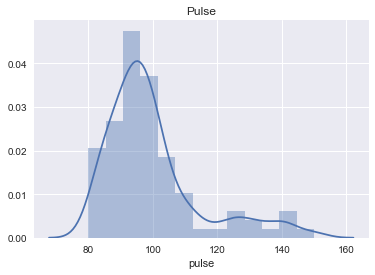

In [29]:
sns.distplot(exercise['pulse'])
plt.title("Pulse")

#### Histogram with rug plot

This histogram describes the number of observations and plots a tick in each bin where observations occurred. In some data where the range of observed measurements of a given continuous variable is larger, this plot may be useful to help quickly identifying specific segments of a continuous variable where measurements are consistently not observed. 


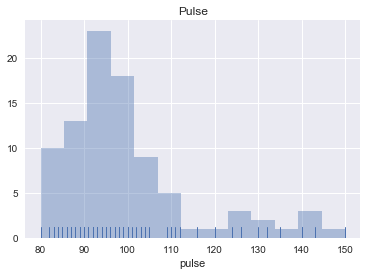

In [30]:
sns.distplot(exercise['pulse'],kde=False,rug=True)
plt.title("Pulse")

#### Kernal density estimate with rug plot

This plot does a good job of giving a general idea of what the underlying distribution of the data is as well as a snapshot of when observations in the data were made. 

The plot, however, does not communicate a lot of specific information that may be valuable including number of occurrences or the exact frequency of observations for a bin of data. 

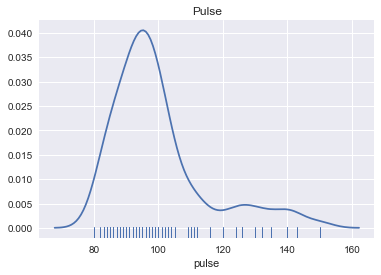

In [32]:
sns.distplot(exercise['pulse'], hist=False, rug=True);
plt.title("Pulse")

## Choose two continuous variables and plot them three different ways
### Car crash data: average # of speeding-related car crashes vs. alcohol-related car crashes

In [36]:
car_crashes.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


#### Scatter Plot

This scatter plot has the benefit of being very detailed and observers can easily identify where outliers occur as well as get a good sense of the relationship between two variables. 

For data sets where the number of observations are significantly greater, the detail afforded by this type of plot loses its value and other visualizations may be more effective at communicating insights about the data. 

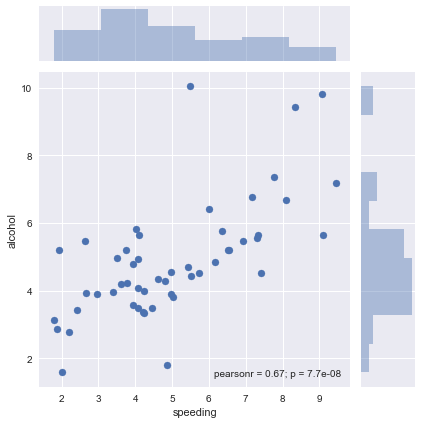

In [37]:
sns.jointplot(x='speeding',y='alcohol',data=car_crashes)

#### Hexbin Plot

This hexbin plot, for example would be potentially more valuable for data sets where there are significantly more observations. 

However, in the context of the data set being used here -- the aesthetic of this hexbin plot is not worth the tradeoff in information that you lose compared to the scatter plot.

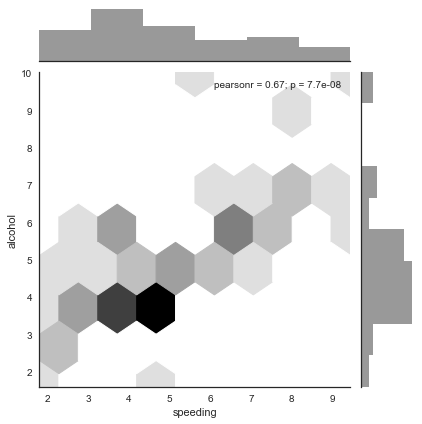

In [39]:
with sns.axes_style("white"):
    sns.jointplot(x='speeding', y='alcohol',data=car_crashes,kind="hex", color="k");

#### Contour Plot

Compared to the hexbin plot, this contour pot is a little bit more precise when it comes to showing observation density.

If you have a very large data set where a scatter plot doesn't make sense but there's some nuance that you still want to capture in your data, then a contour plot is the best of the three aformentioned visualizations. 

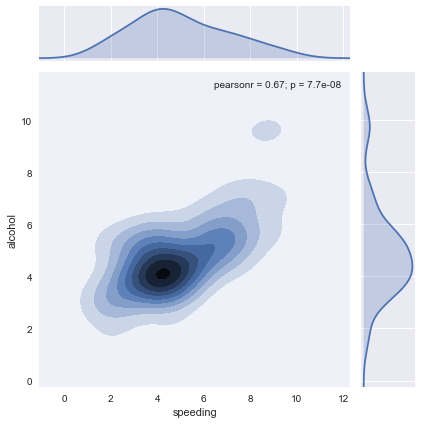

In [41]:
sns.jointplot(x='speeding', y='alcohol',data=car_crashes, kind="kde")

## Choose one continuous variable and one categorical variable and plot them six different ways

### Flight data: number of passengers that flew in a given month

In [42]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


#### Strip plot

This plot does a good job of showing the range of observations that occur within a given category. However it does not do a good job of showing the frequency of any given range of observations as data points overlap in this plot.

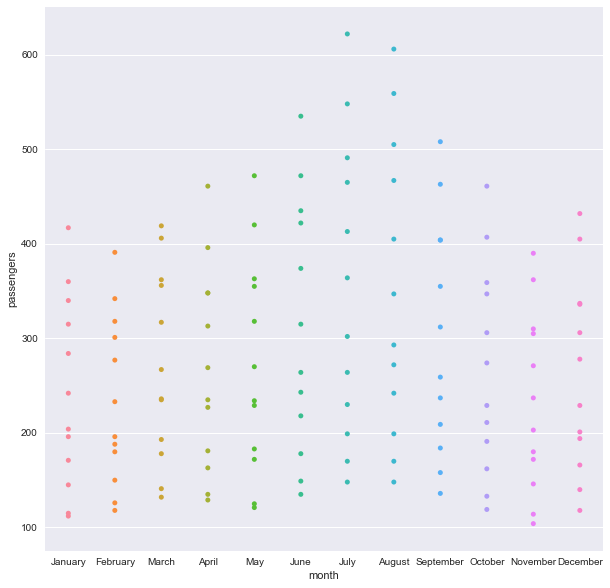

In [67]:
plt.figure(figsize=(10,10))
sns.stripplot(x='month',y='passengers',data=flights)

#### Swarm Plot

This plot is just as good at the previous plot at showing the range of data for each category. This plot also does a better job of showing the frequency of observations as it does not allow for observations to overlap.

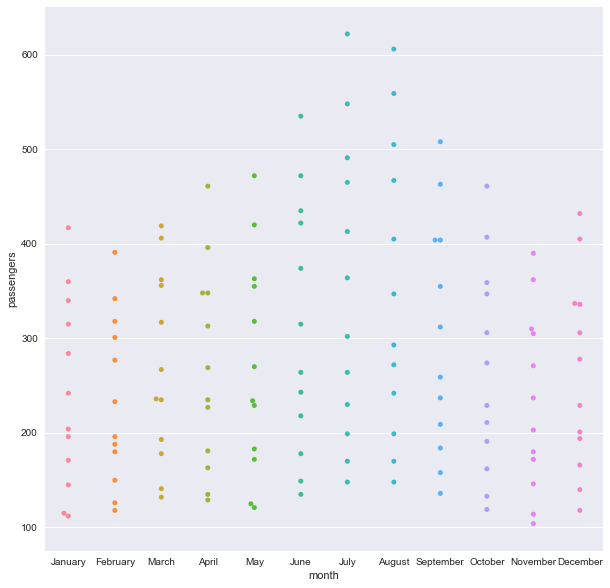

In [54]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='month',y='passengers',data=flights)

#### Box Plot

This box plot is superior to the other two plots at describing the distribution of the data. However you do lose detail on specific observations. 

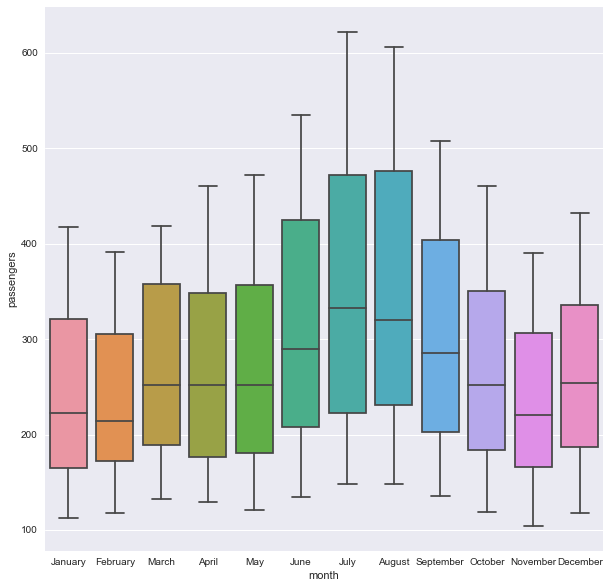

In [56]:
plt.figure(figsize=(10,10))
sns.boxplot(x="month",y="passengers",data=flights)

#### Violin Plot w/ KDE

This plot has all the same detail of the box plot but also uses kernal desntiy estimation to give the researcher some insight on what the distribution of the continuous variable is probably like.  

The same fall backs associated with the box plot apply to the violin plot -- you lose detail on specific observations.

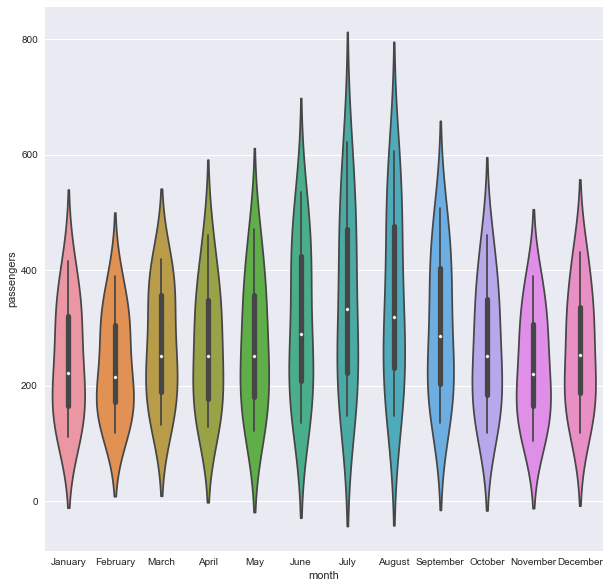

In [66]:
plt.figure(figsize=(10,10))
sns.violinplot(x="month", y="passengers",data=flights);

#### Violin Plot, scale = count

Instead of applying the kernal density estimate, this violin plot uses the shape to describe the number of observations.

However, you lose the detail on the distribution of the continuous variable afforded by the kernal density estimate. Like the previous plots, you also lose detail on specific observations.

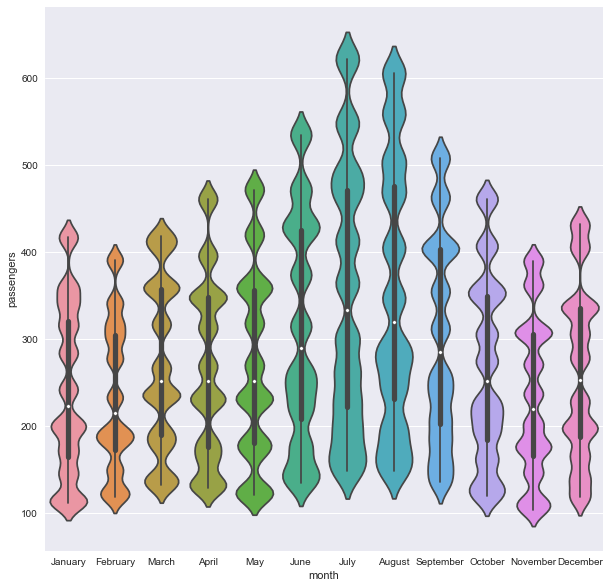

In [59]:
plt.figure(figsize=(10,10))
sns.violinplot(x="month", y="passengers", data=flights,
               bw=.1, scale="count", scale_hue=False);

#### Bar Plot
With this bar plot, you get new information compared to previous plots about the number of observations observed in each category. The error bars are helpful in indicating how spread the data in a category are around the mean value which can provide insight on data. 

However, you lose detail on the distribution of the data as well as observation frequency. 

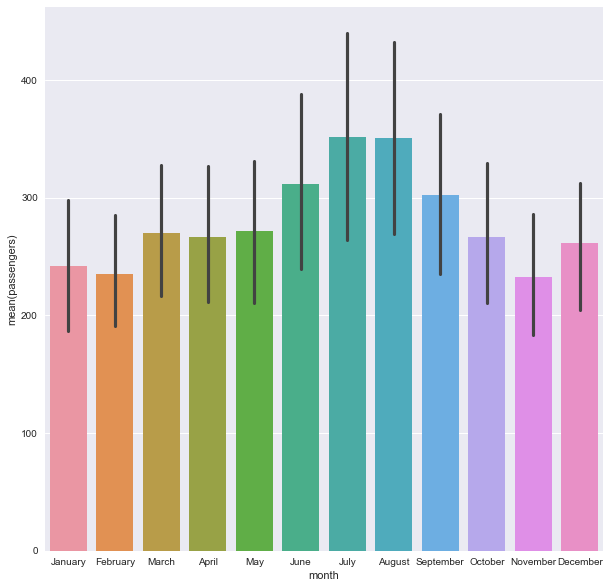

In [64]:
plt.figure(figsize=(10,10))
sns.barplot(x="month", y="passengers", data=flights);